In [19]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import functions.analysis as analysis
import functions.summarize as summarize

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
from tqdm import tqdm  

import plotly.graph_objects as go

In [21]:
df = pd.read_csv("Airports2.csv")
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 412.8+ MB


In [25]:
df.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.599849e+06,3.599849e+06,3.599996e+06,3.599996e+06
mean,2.688910e+03,4.048297e+03,3.722890e+01,6.973190e+02,5.871502e+06,5.897982e+06,3.775029e+01,-9.186178e+01,3.774091e+01,-9.183433e+01
std,4.347617e+03,6.200871e+03,4.961970e+01,6.044165e+02,7.858062e+06,7.906127e+06,5.765453e+00,1.653773e+01,5.736556e+00,1.647228e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.288700e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,1.090000e+02,1.560000e+02,2.000000e+00,2.730000e+02,1.030597e+06,1.025470e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.118000e+03,1.998000e+03,2.500000e+01,5.190000e+02,2.400193e+06,2.400193e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01
75%,3.503000e+03,5.370000e+03,5.500000e+01,9.270000e+02,8.613622e+06,8.635706e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [26]:
# Checking for duplicates
df.duplicated().sum()

41753

In [28]:
# Basic preprocessing 
df_clean = df.drop_duplicates() 
df_clean = df_clean[df_clean['Origin_airport'] != df_clean['Destination_airport']]

In [31]:
# Checking for null values
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [33]:
# Get the unique origin airports with their coordinates
df1 = df[['Origin_airport', 'Org_airport_lat', 'Org_airport_long']].rename(
        columns={'Origin_airport': 'airport_id', 'Org_airport_lat': 'latitude', 'Org_airport_long': 'longitude'})

# Get the unique destination airports with their coordinates 
df2 = df[['Destination_airport', 'Dest_airport_lat', 'Dest_airport_long']].rename(
    columns={'Destination_airport': 'airport_id', 'Dest_airport_lat': 'latitude', 'Dest_airport_long': 'longitude'})

# Concatenate them and drop duplicates 
stacked_coords = pd.concat([df1, df2])
stacked_coords = stacked_coords.drop_duplicates()

# Keep airports that have missing coordinates
stacked_coords = stacked_coords[stacked_coords['latitude'].isna() | stacked_coords['longitude'].isna()]

print(stacked_coords)

        airport_id  latitude  longitude
945            RBG       NaN        NaN
1288           DQF       NaN        NaN
8537           PRB       NaN        NaN
9626           PNC       NaN        NaN
9643           WDG       NaN        NaN
...            ...       ...        ...
3307036        MIW       NaN        NaN
3472388        JCC       NaN        NaN
3488603        NGP       NaN        NaN
3494630        MPS       NaN        NaN
3606576        PHD       NaN        NaN

[243 rows x 3 columns]


In [35]:
# Initialize geolocator (one-time setup)
geolocator = Nominatim(user_agent="airport_coordinates")

# Dictionary to store airport coordinates (avoid redundant API calls)
coords_cache = {}

# Function to get coordinates if they are missing
def get_coordinates(airport_code, retries=3, delay=2):
    if airport_code in coords_cache:
        return coords_cache[airport_code]
    
    # Attempt to geocode with retries in case of timeout
    for _ in range(retries):
        try:
            location = geolocator.geocode(f"{airport_code} Airport", country_codes="US", timeout=10)
            if location:
                coords_cache[airport_code] = (location.latitude, location.longitude)
                return location.latitude, location.longitude
            else:
                return None, None  
        except GeocoderTimedOut:
            print(f"Timeout error while fetching {airport_code}, retrying...")
            # Wait before retrying
            time.sleep(delay)
        except Exception as e:
            print(f"Error fetching {airport_code}: {e}")
            break
    # Return None if all retries fail
    return None, None  
# Use tqdm to track progress
for index, row in tqdm(stacked_coords.iterrows(), total=stacked_coords.shape[0], desc="Geocoding airports"):
    if pd.isna(row["latitude"]) or pd.isna(row["longitude"]):
        lat, lon = get_coordinates(row["airport_id"])
        stacked_coords.at[index, "latitude"] = lat if pd.isna(row["latitude"]) else row["latitude"]
        stacked_coords.at[index, "longitude"] = lon if pd.isna(row["longitude"]) else row["longitude"]

# Display the updated stacked_coords DataFrame
print(stacked_coords)


Geocoding airports: 100%|████████████████████████████████████████████████████████████| 243/243 [04:02<00:00,  1.00it/s]

        airport_id   latitude   longitude
945            RBG  43.239865 -123.357144
1288           DQF        NaN         NaN
8537           PRB  35.675641 -120.630626
9626           PNC  36.731404  -97.099031
9643           WDG  36.375431  -97.787126
...            ...        ...         ...
3307036        MIW  42.112129  -92.917025
3472388        JCC        NaN         NaN
3488603        NGP  27.692197  -97.276022
3494630        MPS  33.097345  -94.963060
3606576        PHD  40.471303  -81.419407

[243 rows x 3 columns]


In [37]:
# After that process get missing airports coordinates again
missing_airports = stacked_coords[stacked_coords['latitude'].isna() | stacked_coords['longitude'].isna()]
# Show the count
print(missing_airports.shape)

missing_airports_list = list(missing_airports['airport_id'])

# Drop rows where 'Name' is in missing airports list
to_drop = stacked_coords[stacked_coords['airport_id'].isin(missing_airports_list)].index
stacked_coords = stacked_coords.drop(to_drop, axis=0)

# Create a single dictionary with airport_id as keys and (latitude, longitude) as values (tuples) that has no missing
# values
airport_coords = dict(zip(stacked_coords['airport_id'], zip(stacked_coords['latitude'], stacked_coords['longitude'])))

(53, 3)


In [39]:
# Fill missing values for origin airports using the dictionary
df['Org_airport_lat'] = df['Org_airport_lat'].fillna(df['Origin_airport'].map(lambda x: airport_coords.get(x, (None, None))[0]))
df['Org_airport_long'] = df['Org_airport_long'].fillna(df['Origin_airport'].map(lambda x: airport_coords.get(x, (None, None))[1]))

# Fill missing values for destination airports using the dictionary
df['Dest_airport_lat'] = df['Dest_airport_lat'].fillna(df['Destination_airport'].map(lambda x: airport_coords.get(x, (None, None))[0]))
df['Dest_airport_long'] = df['Dest_airport_long'].fillna(df['Destination_airport'].map(lambda x: airport_coords.get(x, (None, None))[1]))

In [41]:
# Performing checks to make sure everything went well
print(df.shape)
print(df.isnull().sum())


(3606803, 15)
Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           1402
Org_airport_long          1402
Dest_airport_lat          1376
Dest_airport_long         1376
dtype: int64


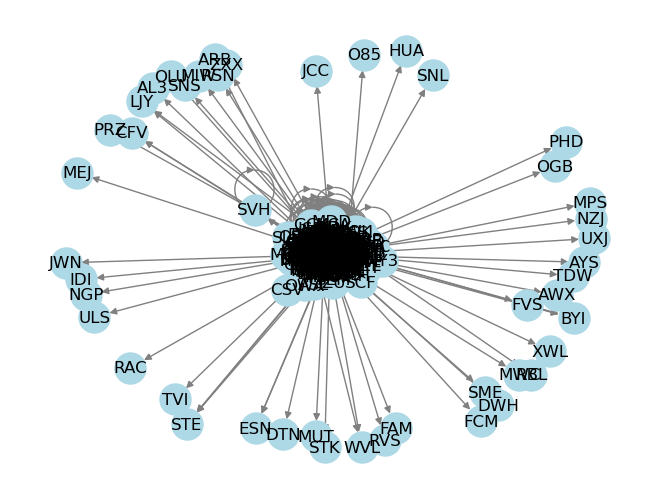

In [45]:
# Creating the flight network graph
flight_network = nx.DiGraph()
for _, row in df.iterrows():
    flight_network.add_edge(row['Origin_airport'], row['Destination_airport'])
# Visualize the graph (optional)
nx.draw(flight_network, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
plt.show()    


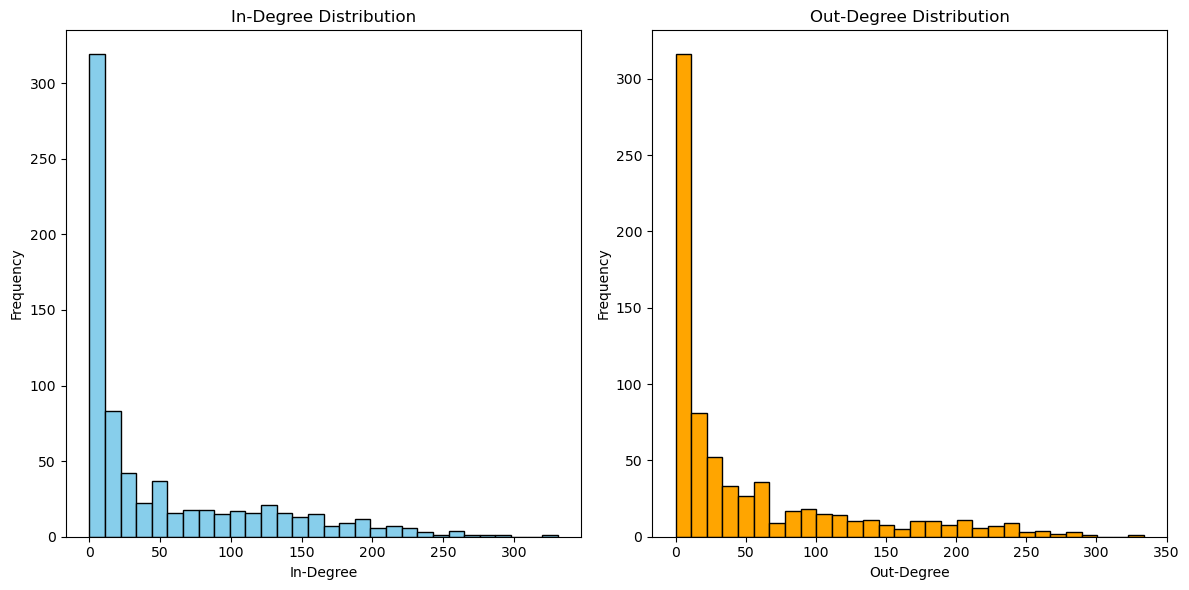

Graph Summary Report:
Number of airports (nodes): 727
Number of flights (edges): 36719
Graph Density: 0.1391
Graph Type: Dense

Identified Hubs (Airports with high degree):
   Node  In-Degree  Out-Degree  Total Degree
0   COS        176         164           340
1   ORD        240         286           526
2   PHL        199         230           429
3   MSY        191         209           400
4   LIT        212         212           424
..  ...        ...         ...           ...
73  EWR        195         241           436
74  ELP        198         223           421
75  MDW        202         216           418
76  PHX        225         259           484
77  SYR        160         154           314

[78 rows x 4 columns]


In [49]:
summarize.summarize_graph_features(flight_network)

# 4. Airline Network Partitioning (Q4) 


**Minimum Cut Algorithm:**

Implement the minimum cut algorithm to partition the graph into two disconnected subgraphs.

In [88]:
def minimum_cut_disconnection(flight_network):
    G = nx.DiGraph()
    for u, v in flight_network:
        G.add_edge(u, v, capacity=1)
        G.add_edge(v, u, capacity=1)  # For undirected graphs, add the reverse edge

    nodes = list(G.nodes)
    if len(nodes) < 2:
        raise ValueError("Graph must have at least two nodes to compute a minimum cut.")

    source = nodes[0]
    target = nodes[1]

    cut_value, (set1, set2) = nx.minimum_cut(G, source, target)
    cut_edges = [(u, v) for u in set1 for v in set2 if G.has_edge(u, v)]

    return cut_edges, set1, set2


**Visualization:**

Visualize the original graph and the resulting subgraphs after removing the minimum cut edges.

In [91]:
def visualize_graph(G, cut_edges=None, set1=None, set2=None):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

    if cut_edges:
        nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color='red', width=2)

    if set1 and set2:
        nx.draw_networkx_nodes(G, pos, nodelist=set1, node_color='green', label="Partition 1")
        nx.draw_networkx_nodes(G, pos, nodelist=set2, node_color='orange', label="Partition 2")

    plt.legend(loc="best")
    plt.show()


**Example Usage:**

Use the functions to find the minimum cut and visualize the original and partitioned graphs.

Edges to remove to disconnect the graph: [('MHK', 'AMW')]
Partition 1: {'UBS', 'BPT', 'MRI', 'SBY', 'PHL', 'MSY', 'BRL', 'SSC', 'HKS', 'SME', 'SHR', 'LIT', 'NKX', 'GSB', 'GCK', 'BRO', 'GRF', 'HVN', 'CSV', 'TUL', 'CGI', 'FOD', 'DLH', 'OKK', 'FAM', 'JBR', 'WV1', 'MHT', 'AHN', 'TWF', 'SKA', 'SUX', 'FSD', 'TNT', 'PIB', 'GSP', 'RDD', 'ELM', 'MFR', 'CGF', 'SHV', 'MAE', 'MEI', 'LXN', 'OFF', 'HSV', 'BWD', 'XWL', 'DQF', 'TIK', 'GFK', 'PFN', 'STC', 'VCT', 'FLG', 'ABI', 'FOE', 'HSI', 'DBQ', 'SAN', 'CAD', 'SNL', 'BTM', 'GNV', 'NFL', 'SGH', 'FLL', 'FFO', 'ZXX', 'NZC', 'TTN', 'HUF', 'MMI', 'BBC', 'OH1', 'TOL', 'GGG', 'BMG', 'MKE', 'HYS', 'HVR', 'RAP', 'FAT', 'IDI', 'ALW', 'NC3', 'WRB', 'GSO', 'GTR', 'CBE', 'DMA', 'HBG', 'MWH', 'PGD', 'IMT', 'BFD', 'LUL', 'MSN', 'MIE', 'BJJ', 'CAK', 'VWH', 'BIH', 'GRR', 'EVV', 'SAC', 'GRB', 'ALM', 'TBN', 'RFD', 'ISN', 'TN6', 'ERI', 'TYR', 'ABE', 'AYS', 'OMA', 'FVS', 'NGP', 'RUT', 'FWA', 'ZZV', 'BRD', 'PBI', 'MCC', 'MCE', 'FCH', 'MQT', 'EKX', 'UIN', 'TVI', 'BUF', 'CAE

C:\Users\sadam\AppData\Local\Temp\ipykernel_8412\4022342639.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


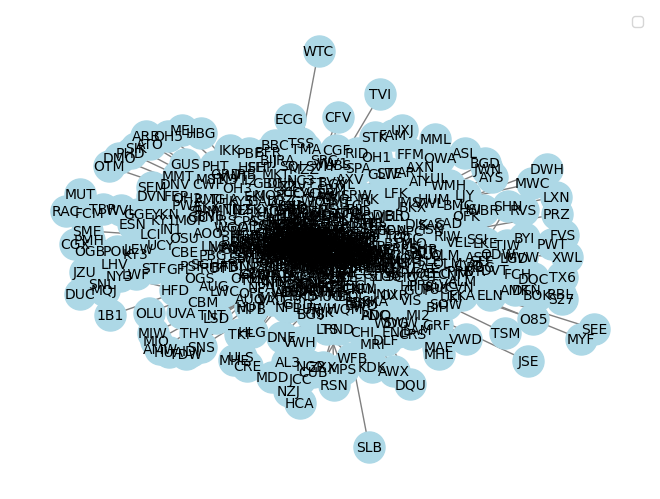

Disconnected Graph:


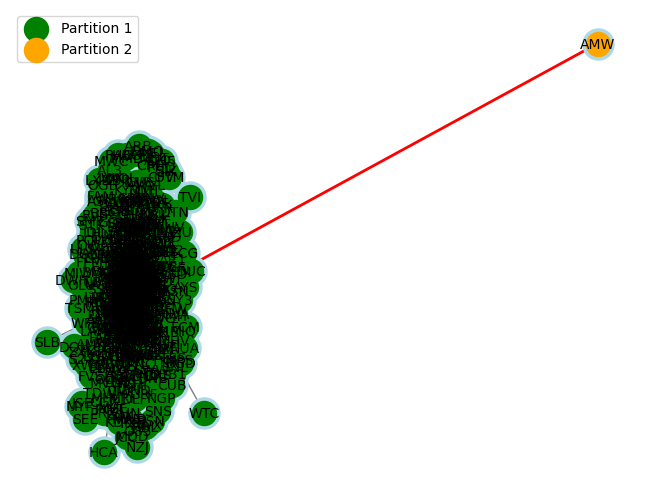

In [94]:
# Example usage
flight_network = [(row['Origin_airport'], row['Destination_airport']) for index, row in df_clean.iterrows()]
cut_edges, set1, set2 = minimum_cut_disconnection(flight_network)

# Print results
print("Edges to remove to disconnect the graph:", cut_edges)
print("Partition 1:", set1)
print("Partition 2:", set2)

# Visualize the original graph
G = nx.Graph()
G.add_edges_from(flight_network)
print("Original Graph:")
visualize_graph(G)

# Visualize the graph after removing cut edges
G.remove_edges_from(cut_edges)
print("Disconnected Graph:")
visualize_graph(G, cut_edges=cut_edges, set1=set1, set2=set2)


## Minimum Cut Disconnection for Flight Networks

This Python script leverages the NetworkX library to compute and visualize the minimum cut for a directed graph representing a network of flights between airports. The minimum cut identifies the smallest set of flights (edges) that, if removed, would disconnect the network into two separate subgraphs.

## Overview of the Code
The script is divided into three main components:

## 1. minimum_cut_disconnection:
   This function calculates the minimum cut in the flight network and returns the edges that need to be removed to achieve the disconnection.

## 2. visualize_graph:
   This function visualizes the flight network, highlighting the cut edges and the resulting partitions after the cut.
## 3. Example Usage:
   Demonstrates how to load and preprocess the dataset, construct the flight network graph, find the minimum cut, and visualize the original and partitioned graphs.

## Functions

## 1. minimum_cut_disconnection(flight_network)

This function performs the following tasks:

**Input:** A list of tuples representing the edges of the graph. Each tuple represents a flight between two airports (nodes).

**Process:**

         -Creates a directed graph using NetworkX.
         -Calculates the minimum cut between two arbitrarily chosen nodes in the graph using nx.minimum_cut().
         -Extracts the edges that are part of the minimum cut.

**Output:**

         -cut_edges: A list of edges to be removed in order to disconnect the graph.
         -set1: The first partition of the graph after the cut.
         -set2: The second partition of the graph after the cut.

## 2. visualize_graph(G, cut_edges=None, set1=None, set2=None)

This function visualizes the graph and highlights:

**The cut edges:** Edges that need to be removed to disconnect the graph.

**The partitions:** The two disconnected subgraphs after removing the cut edges.

**Input:**

        -G: The graph to visualize.
        -cut_edges: The edges to highlight as removed (optional).
        -set1, set2: The two partitions created after the minimum cut (optional).
**Process:**

        -Visualizes the graph using a spring layout for node positioning.
        -Draws the original graph with lightblue nodes and gray edges.
        -Highlights the cut edges in red if provided.
        -Visualizes the nodes in set1 in green and those in set2 in orange if provided.